# Laboratorio 2: Independencia de variables mediante el test $\chi^2$

****
#### En primer lugar, importamos las librerías con las que vamos a trabajar: pandas, matplotlib, seaborn, scipy, etc.

In [505]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as plo
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

#### Seguidamente, necesitamos leer el dataset, el cual, en este caso fue sacado de la página de Kaggle "We are from our childhood":

In [506]:
young = pd.read_csv('dataset.csv')
print("\nCantidad de Personas:   "+str(young.shape[0]))
print("Cantidad de Categorías: "+str(young.shape[1]))


Cantidad de Personas:   1010
Cantidad de Categorías: 150


****
#### Genero las tablas de contingencias entre las variables "Gender" y el resto de las variables categóricas del dataset, para luego ir realizando el test de independencia entre "Gender" y cada una del resto de las variables categóricas.

In [507]:
tabla_smok_gender = pd.crosstab(young.Gender, young['Smoking'] ,               margins=True)
tabla_alco_gender = pd.crosstab(young.Gender, young['Alcohol'],                margins=True)
tabla_punt_gender = pd.crosstab(young.Gender, young['Punctuality'],            margins=True)
tabla_lyin_gender = pd.crosstab(young.Gender, young['Lying'],                  margins=True)
tabla_inte_gender = pd.crosstab(young.Gender, young['Internet usage'],         margins=True)
tabla_educ_gender = pd.crosstab(young.Gender, young['Education'],              margins=True)
tabla_lrha_gender = pd.crosstab(young.Gender, young['Left - right handed'],    margins=True)
tabla_only_gender = pd.crosstab(young.Gender, young['Only child'],             margins=True)
tabla_vito_gender = pd.crosstab(young.Gender, young['Village - town'],         margins=True)
tabla_hous_gender = pd.crosstab(young.Gender, young['House - block of flats'], margins=True)

#Muestro las tablas de contingencia
if True:
    display(tabla_smok_gender)
    display(tabla_alco_gender)
    display(tabla_punt_gender)
    display(tabla_lyin_gender)
    display(tabla_inte_gender)
    display(tabla_educ_gender)
    display(tabla_lrha_gender)
    display(tabla_only_gender)
    display(tabla_vito_gender)
    display(tabla_hous_gender)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Gender,,,,,
female,111,109,123,246,589
male,78,65,84,180,407
All,189,174,207,426,996


Alcohol,drink a lot,never,social drinker,All
Gender,,,,
female,104,68,418,590
male,117,55,237,409
All,221,123,655,999


Punctuality,i am always on time,i am often early,i am often running late,All
Gender,,,,
female,219,187,186,592
male,178,137,95,410
All,397,324,281,1002


Lying,everytime it suits me,never,only to avoid hurting someone,sometimes,All
Gender,,,,,
female,79,32,148,334,593
male,59,19,120,211,409
All,138,51,268,545,1002


Internet usage,few hours a day,less than an hour a day,most of the day,no time at all,All
Gender,,,,,
female,428,103,60,2,593
male,312,36,62,1,411
All,740,139,122,3,1004


Education,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,All
Gender,,,,,,,
female,123,6,0,44,54,365,592
male,89,4,5,36,24,253,411
All,212,10,5,80,78,618,1003


Left - right handed,left handed,right handed,All
Gender,,,
female,47,544,591
male,53,357,410
All,100,901,1001


Only child,no,yes,All
Gender,,,
female,439,153,592
male,312,98,410
All,751,251,1002


Village - town,city,village,All
Gender,,,
female,417,174,591
male,287,122,409
All,704,296,1000


House - block of flats,block of flats,house/bungalow,All
Gender,,,
female,350,240,590
male,242,168,410
All,592,408,1000


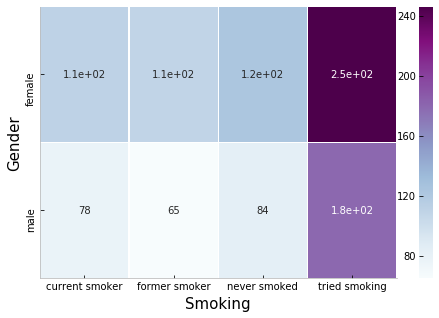

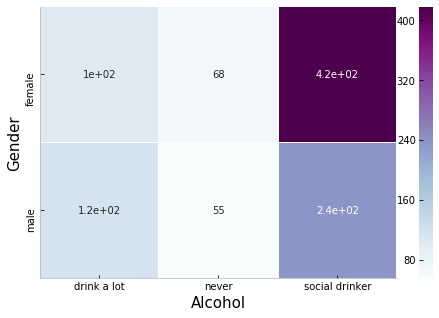

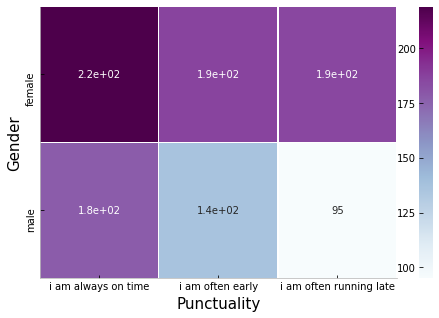

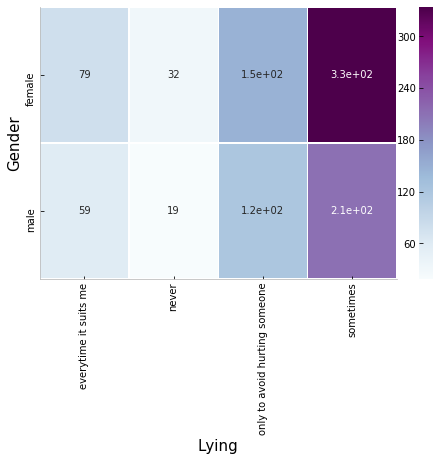

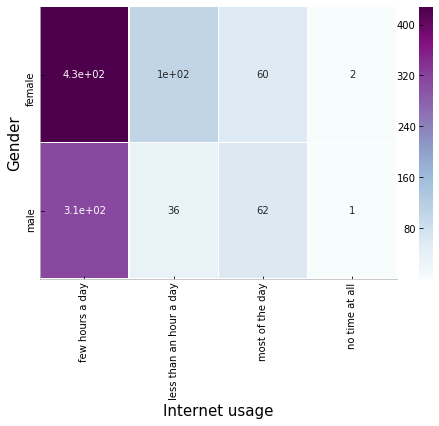

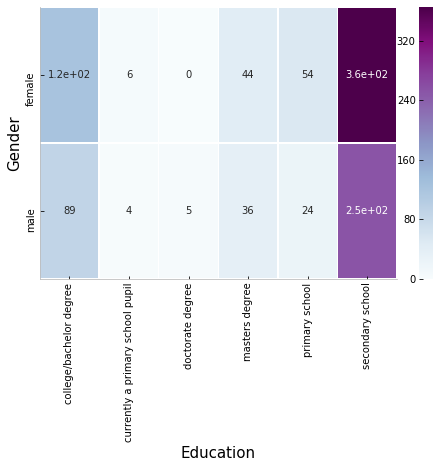

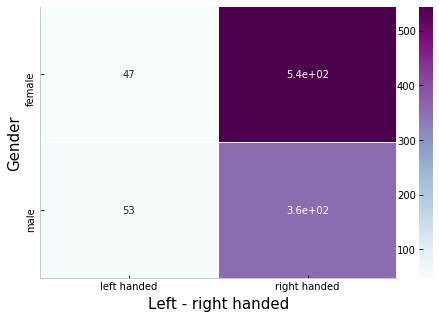

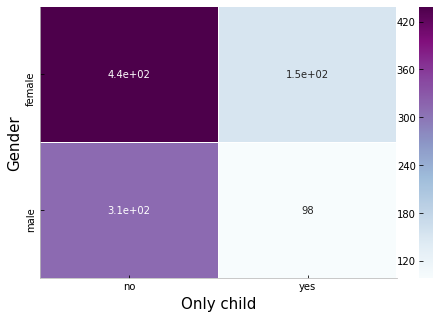

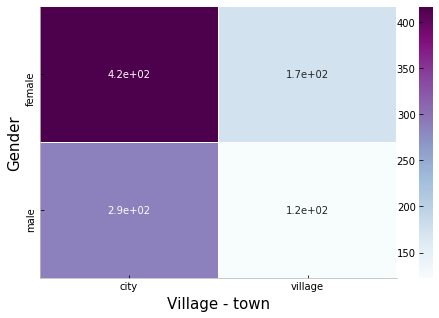

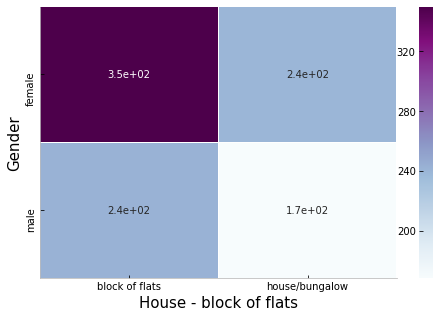

In [530]:
if True:
    #Genero las mismas tablas pero sin los márgenes "All" para poder realizar los mapas de calor
    obs_tabla_smok_gender = pd.crosstab(young.Gender, young['Smoking'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_smok_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Smoking",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_alco_gender = pd.crosstab(young.Gender, young['Alcohol'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_alco_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Alcohol",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_punt_gender = pd.crosstab(young.Gender, young['Punctuality'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_punt_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Punctuality",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_lyin_gender = pd.crosstab(young.Gender, young['Lying'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_lyin_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Lying",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_inte_gender = pd.crosstab(young.Gender, young['Internet usage'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_inte_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Internet usage",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()

    obs_tabla_educ_gender = pd.crosstab(young.Gender, young['Education'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_educ_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Education",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_lrha_gender = pd.crosstab(young.Gender, young['Left - right handed'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_lrha_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Left - right handed",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_only_gender = pd.crosstab(young.Gender, young['Only child'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_only_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Only child",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_vito_gender = pd.crosstab(young.Gender, young['Village - town'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_vito_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("Village - town",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()
    
    obs_tabla_hous_gender = pd.crosstab(young.Gender, young['House - block of flats'], margins=False)
    plt.figure(figsize=(8,5))
    sns.heatmap(obs_tabla_hous_gender, annot=True, annot_kws={"size": 10}, linewidths=.5, cmap="BuPu")
    plt.xlabel("House - block of flats",fontsize=15)
    plt.ylabel("Gender",fontsize=15)
    sns.despine()

****
#### El test de independencia de $\chi^2$, lo podemos realizar de manera manual ó bien utilizando la librería "scipy.stats". En nuestro caso vamos a mostrar en primer lugar como sería el cálculo manual y luego usaremos la función "chi2_contingency".
#### Además, el test $\chi^2$, define las hipótesis de la siguiente manera:
$$H_0 = Las\;variables\;son\;independientes\;(Hipotesis\;nula)$$
$$H_1 = Las\;variables\;estan\;relacionadas$$

In [509]:
#Test de independencia Chi-Cuadrado para "Gender" y "Smoking" (cálculo manual)
print("\nGender - Smoking: Manual\n")
expected = np.outer(tabla_smok_gender["All"][0:2],tabla_smok_gender.ix["All"][0:4])/tabla_smok_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["current smoker","former smoker","never smoked","tried smoking"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_smok_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   # 3 grados de libertad
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))
del expected, chi_squared_stat, crit, p_value


Gender - Smoking: Manual

Chi2 = 1.246099633240504
P_valor = 0.7419702557454063


In [536]:
#Test de independencia Chi-Cuadrado para "Gender" y "Smoking" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_smok_gender)
print("\nGender - Smoking: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del chi2, p, dof, ex


Gender - Smoking: Scipy

Chi2 = 1.246099633240504
P_valor = 0.7419702557454063

Las variables son INDEPENDIENTES


#### Como podemos ver, los valores obtenidos de $\chi^2$ y $p_{valor}$ son los mismos, por lo tanto el cálculo manual se corresponde con el cálculo mediante la función de scipy.
#### Dado que $p_{valor}$ es mayor que el umbral estándar $0.05$ (nivel de significancia), no podemos rechazar la hipótesis nula de que las variables son independientes. 

#### Continuamos realizando los test de $\chi^2$ para el resto de las variables categóricas.

In [537]:
#Test de independencia Chi-Cuadrado para "Gender" y "Alcohol" (cálculo manual)
print("\nGender - Alcohol: Manual\n")
expected = np.outer(tabla_alco_gender["All"][0:2],tabla_alco_gender.ix["All"][0:3])/tabla_alco_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["drink a lot","never","social drinker"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_alco_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 2)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=2)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Alcohol" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_alco_gender)
print("\nGender - Alcohol: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Alcohol: Manual

Chi2 = 20.018840603138074
P_valor = 4.4974256864338535e-05

Gender - Alcohol: Scipy

Chi2 = 20.018840603138077
P_valor = 4.4974256864364367e-05

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [538]:
#Test de independencia Chi-Cuadrado para "Gender" y "Punctuality" (cálculo manual)
print("\nGender - Punctuality: Manual\n")
expected = np.outer(tabla_punt_gender["All"][0:2],tabla_punt_gender.ix["All"][0:3])/tabla_punt_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["i am always on time","i am often early","i am often running late"]
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_punt_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 2)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=2)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Punctuality" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_punt_gender)
print("\nGender - Punctuality: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Punctuality: Manual

Chi2 = 8.647469417821046
P_valor = 0.013250304987231898

Gender - Punctuality: Scipy

Chi2 = 8.647469417821046
P_valor = 0.013250304987231855

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [539]:
#Test de independencia Chi-Cuadrado para "Gender" y "Lying" (cálculo manual)
print("\nGender - Lying: Manual\n")
expected = np.outer(tabla_lyin_gender["All"][0:2],tabla_lyin_gender.ix["All"][0:4])/tabla_lyin_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["everytime it suits me","never","only to avoid hurting someone","sometimes"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_lyin_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Lying" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_lyin_gender)
print("\nGender - Lying: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Lying: Manual

Chi2 = 3.2173514714469347
P_valor = 0.3593124160315243

Gender - Lying: Scipy

Chi2 = 3.2173514714469347
P_valor = 0.3593124160315243

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [540]:
#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo manual)
print("\nGender - Internet usage: Manual\n")
expected = np.outer(tabla_inte_gender["All"][0:2],tabla_inte_gender.ix["All"][0:4])/tabla_inte_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["few hours a day","less than an hour a day","most of the day","no time at all"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_inte_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_inte_gender)
print("\nGender - Internet usage: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Internet usage: Manual

Chi2 = 18.45942370362832
P_valor = 0.00035358584682188

Gender - Internet usage: Scipy

Chi2 = 18.459423703628325
P_valor = 0.0003535858468218354

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [541]:
#Test de independencia Chi-Cuadrado para "Gender" y "Education" (cálculo manual)
print("\nGender - Education: Manual\n")
expected = np.outer(tabla_educ_gender["All"][0:2],tabla_educ_gender.ix["All"][0:6])/tabla_educ_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["college/bachelor degree","currently a primary school pupil","doctorate degree","masters degree","primary school","secondary school"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_educ_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 5)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=5)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Education" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_educ_gender)
print("\nGender - Education: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Education: Manual

Chi2 = 11.190435443319206
P_valor = 0.047732244507548205

Gender - Education: Scipy

Chi2 = 11.190435443319206
P_valor = 0.04773224450754823

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [542]:
#Test de independencia Chi-Cuadrado para "Gender" y "Left-right handed" (cálculo manual)
print("\nGender - Left-right handed: Manual\n")
expected = np.outer(tabla_lrha_gender["All"][0:2],tabla_lrha_gender.ix["All"][0:2])/tabla_lrha_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["left handed","right handed"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_lrha_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Left-right handed" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_lrha_gender, correction=False)
print("\nGender - Left-right handed: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Left-right handed: Manual

Chi2 = 6.6608286570376425
P_valor = 0.009855507556855159

Gender - Left-right handed: Scipy

Chi2 = 6.660828657037643
P_valor = 0.009855507556855131

Las variables son DEPENDIENTES


#### Dado que $p_{valor}<0.05$, rechazamos la hipótesis nula de que las variables son independientes. 

In [543]:
#Test de independencia Chi-Cuadrado para "Gender" y "Only child" (cálculo manual)
print("\nGender - Only child: Manual\n")
expected = np.outer(tabla_only_gender["All"][0:2],tabla_only_gender.ix["All"][0:2])/tabla_only_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["no","yes"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_only_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Only child" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_only_gender, correction=False)
print("\nGender - Only child: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Only child: Manual

Chi2 = 0.48666224585859963
P_valor = 0.48541999004213265

Gender - Only child: Scipy

Chi2 = 0.4866622458585997
P_valor = 0.48541999004213254

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [544]:
#Test de independencia Chi-Cuadrado para "Gender" y "Village-town" (cálculo manual)
print("\nGender - Village-town: Manual\n")
expected = np.outer(tabla_vito_gender["All"][0:2],tabla_vito_gender.ix["All"][0:2])/tabla_vito_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["city","village"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_vito_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Village-town" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_vito_gender, correction=False)
print("\nGender - Village-town: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - Village-town: Manual

Chi2 = 0.01739308175707461
P_valor = 0.8950769669445118

Gender - Village-town: Scipy

Chi2 = 0.01739308175707461
P_valor = 0.8950769669445118

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

In [545]:
#Test de independencia Chi-Cuadrado para "Gender" y "House-block of flats" (cálculo manual)
print("\nGender - House-block of flats: Manual\n")
expected = np.outer(tabla_hous_gender["All"][0:2],tabla_hous_gender.ix["All"][0:2])/tabla_hous_gender["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["block of flats","house/bungalow"] 
expected.index = ["female","male"]
chi_squared_stat = (((obs_tabla_hous_gender-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "House-block of flats" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= obs_tabla_hous_gender, correction=False)
print("\nGender - House-block of flats: Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))
#print("Grados de Libertad = "+str(dof))
#print("Esperados = "+str(ex))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    
del expected, chi2, p, chi_squared_stat, crit, p_value, dof, ex


Gender - House-block of flats: Manual

Chi2 = 0.008872525469077368
P_valor = 0.9249549841293704

Gender - House-block of flats: Scipy

Chi2 = 0.008872525469077366
P_valor = 0.9249549841293704

Las variables son INDEPENDIENTES


#### Dado que $p_{valor}>0.05$, aceptamos la hipótesis nula de que las variables son independientes. 

### Para resumir los resultados obtenidos con los test de independencia $\chi^2$, se crea la siguiente tabla:

In [546]:
tabla_independencia = pd.DataFrame({'Gender/Smoking':'SI',
                                    'Gender/Alcohol':'NO',
                                    'Gender/Punctuality':'NO',
                                    'Gender/Lying':'SI',
                                    'Gender/Internet usage':'NO',
                                    'Gender/Education':'NO',
                                    'Gender/Left-right handed':'NO',
                                    'Gender/Only child':'SI',
                                    'Gender/Village-town':'SI',
                                    'Gender/House-block of flats':'SI'},index=['Independiente'])
display(tabla_independencia)

,Gender/Alcohol,Gender/Education,Gender/House-block of flats,Gender/Internet usage,Gender/Left-right handed,Gender/Lying,Gender/Only child,Gender/Punctuality,Gender/Smoking,Gender/Village-town
Independiente,NO,NO,SI,NO,NO,SI,SI,NO,SI,SI
